In [78]:
import pandas as pd # pandas مكتبة لمعالجة البيانات وتحليلها.
import numpy as np # numpy هي مكتبة للحوسبة العددية في بايثون. وهو يوفر الدعم للمصفوفات متعددة الأبعاد، إلى جانب مجموعة من الوظائف الرياضية للعمل على هذه المصفوفات.
import matplotlib.pyplot as plt #  matplotlib عبارة عن مكتبة تخطيط  توفر وحدة pyplot واجهة ملائمة لإنشاء أنواع مختلفة من المخططات .
import seaborn as sns # seaborn عبارة عن مكتبة لتصور البيانات تعتمد على matplotlib.

from sklearn.model_selection import train_test_split # sklearn هي مكتبة للتعلم الآلي في بايثون. تُستخدم الدالة Train_test_split لتقسيم مجموعة البيانات إلى مجموعات تدريب واختبار
from sklearn.preprocessing import StandardScaler # StandardScaler هي فئة في sklearn لتوحيد الميزات هذا يضمن تطبيق نفس القياس عبر مجموعة البيانات
from sklearn.linear_model import LogisticRegression # LogisticRegression هي فئة في sklearn لأداء الانحدار اللوجستي
from sklearn.feature_selection import SelectPercentile # SelectPercentile هي فئة في sklearn لاختيار أفضل الميزات بناءً على الاختبارات الإحصائية. يسمح باختيار نسبة محددة من الميزات ذات أعلى الدرجات.
from sklearn.feature_selection import f_regression # 
from sklearn.model_selection import KFold # KFold هي فئة في sklearn لتقسيم مجموعة البيانات إلى طيات متعددة يوفر طريقة تكرارية لتدريب وتقييم النماذج على مجموعات فرعية مختلفة من البيانات.
from sklearn.tree import DecisionTreeClassifier, plot_tree # DecisionTreeClassifier عبارة عن فئة في sklearn لبناء نماذج شجرة القرار.Plot_tree هي وظيفة لتصور أشجار القرار.
from sklearn import svm # svm هي وحدة نمطية في sklearn توفر فئات لنماذج أجهزة المتجهات الداعمة.
from sklearn.naive_bayes import GaussianNB # GaussianNB هي فئة في sklearn لأداء تصنيف  Naive Bayes

import tensorflow as tf # إطار عمل مفتوح المصدر للتعلم الآلي. فهو يوفر نظامًا بيئيًا مرنًا وفعالًا لبناء ونشر نماذج التعلم الآلي، وخاصة نماذج التعلم العميق.
from tensorflow import keras # keras هي مكتبة شبكات عصبية سهلة الاستخدام مبنية على  Tensorflow.

import networkx as nx # Networkx هي مكتبة Python لإنشاء ومعالجة ودراسة بنية  ووظائف الشبكات . ويوفر أدوات للعمل مع الرسوم البيانية والشبكات.

from tensorflow.keras.utils import plot_model #  plot_model هي وظيفة في keras.utils لتصور نموذج keras كرسم بياني.
import pydot # pydot هي واجهة Python لحزمة تخطيط الرسم البياني والتصور . يتم استخدامه لإنشاء ومعالجة هياكل الرسم البياني وتصورها.
from graphviz import Digraph # graphviz هي مكتبة Python لإنشاء تصورات الرسم البياني وعرضها. توفر فئة Digraph طريقة لإنشاء الرسوم البيانية

from sklearn.metrics import confusion_matrix # ارتباك_ماتريكس هي وظيفة في sklearn.metrics لحساب مصفوفة الارتباك، 
from sklearn.metrics import accuracy_score , recall_score , f1_score , precision_score # هي وظائف لحساب مقاييس التقييم المختلفة المستخدمة بشكل شائع في مهام التصنيف.

import warnings # warnings وحدة بايثون للتحكم في رسائل التحذير
warnings.filterwarnings('ignore')
# filterwarnings وظيفة لتجاهل رسائل تحذيرية 

# Exploration

In [79]:
# قراءة ملف "framingham.csv"  تحميله في pandas DataFrame
df_csv=pd.read_csv('framingham.csv')
df_csv

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [80]:
# عرض معلومات حول DataFrame 'df_csv'
df_csv.info()
يوفر  نظرة عامة على بنية DataFrame،
# بما في ذلك عدد الصفوف والأعمدة وأنواع البيانات واستخدام الذاكرة.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [81]:
# حساب عدد القيم المفقودة في كل عمود من DataFrame 'df_csv'
missing_values = df_csv.isnull().sum()
print(missing_values)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [82]:
# حساب النسبة المئوية للقيم المفقودة في كل عمود من DataFrame 'df_csv'
prencent_missing = (missing_values / len(df_csv)) * 100
print(prencent_missing)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


In [83]:
# إنشاء إحصائيات وصفية لـ DataFrame 'df_csv'
# يوفر  إحصائيات موجزة للأعمدة  في DataFrame،
# بما في ذلك العد والمتوسط والانحراف المعياري والحد الأدنى  والحد الأقصى للقيم.
df_csv.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [84]:
# حساب عدد الصفوف المكررة في DataFrame 'df_csv'
df_csv.duplicated().sum()

0

# Analysis

In [85]:
# يرجع صف يمثل أبعاد DataFrame،
# حيث العنصر الأول هو عدد الصفوف والعنصر الثاني هو عدد الأعمدة.
df_csv.shape

(4238, 16)

In [86]:
# قيم فهرس DataFrame.
df_csv.index

RangeIndex(start=0, stop=4238, step=1)

In [87]:
# قائمة بأسماء الأعمدة في DataFrame.
df_csv.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [88]:
# عدد القيم غير المفقودة لكل عمود في DataFrame.
df_csv.count()

male               4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD         4238
dtype: int64

In [89]:
# فصل البيانات الي سمات و متغير المستهدف
x_d = df_csv.drop('diabetes' , axis = 1)
y = df_csv['diabetes']
print(x_d)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  totChol  sysBP  diaBP    BMI  heartRate  \
0                   0             0    195.0  106.0   70.0  26.97       80.0   
1                   0             0    250.0  121.0   81.0 

In [90]:
# حساب مصفوفة الارتباط لـ DataFrame 'x_d'
# مصفوفة ارتباط تقيس العلاقة الخطية بين المتغيرات.
# تمثل مصفوفة الارتباط الناتجة معاملات الارتباط بين أعمدة 'x_d'.
corr=df_csv.corr()
corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


<Axes: xlabel='diabetes', ylabel='count'>

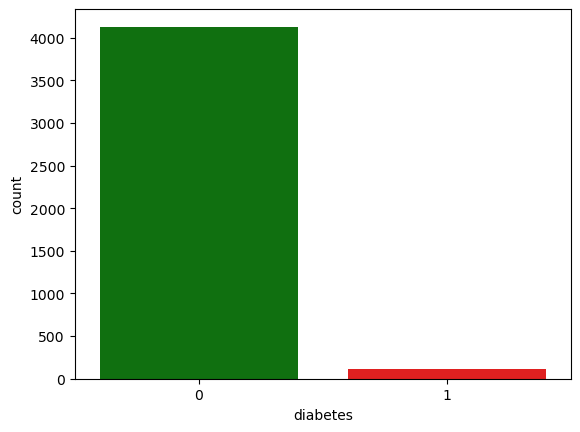

In [91]:
# إنشاء مخطط العد باستخدام عمود "مرض السكري" ،يعرض مخطط العد عدد التكرارات
sns.countplot(x='diabetes',data=df_csv,palette=['g','r'])


Text(0.5, 1.0, 'precntages of Diabetes Cases')

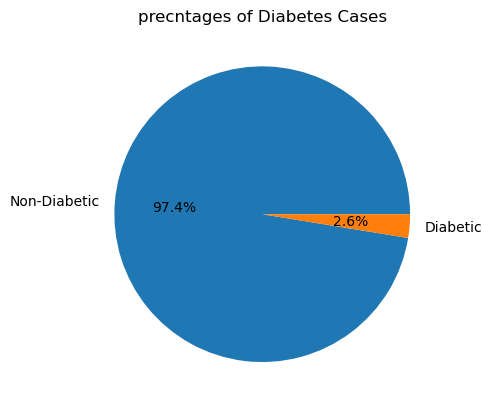

In [92]:
#     إنشاء مخطط دائري لتصور النسب المئوية لحالات مرضى السكري وغير المصابين بالسكري في المتغير المستهدف
#In this context, `y` represents the target variable, where `1` typically represents diabetic cases and `0` represents non-diabetic cases.
counts = y.value_counts()
#يحسب هذا السطر النسب المئوية لكل قيمة  عن طريق قسمة الأعداد على مجموع الأعداد وضربها في 100. يتم تعيين النسب المئوية الناتجة للمتغير `precntages `.
precntages = counts / counts.sum()*100
#   قائمة تسميات للمخطط الدائري. تمثل التسميات الفئات التي يتم تصورها، حيث تقابل "غير المصابين بالسكري" القيمة `0` و"مرضى السكري" المقابلة للقيمة `1` في `y`.
labels = ['Non-Diabetic', 'Diabetic']
plt.pie(precntages, labels=labels, autopct='%1.1f%%')
#   عنوان المخطط الدائري  "النسب المئوية لحالات مرض السكري".
plt.title('precntages of Diabetes Cases')


In [93]:
# حساب متوسط كل عمود  داخل كل مجموعة،  يوفر المتوسط
# قيم لكل عمود   لمجموعتي "مرضى السكري" و"غير المصابين بالسكري".
df_csv.groupby('diabetes').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
diabetes,,,,,,,,,,,,,,,
0,0.427949,49.443933,1.985349,0.497699,9.075122,0.028200,0.005813,0.304674,236.429412,131.953984,82.796077,25.744730,75.783188,79.489186,0.146282
1,0.477064,54.926606,1.735849,0.357798,6.293578,0.084112,0.009174,0.532110,247.759259,147.444954,86.582569,28.003178,79.504587,170.333333,0.366972


# processing

In [94]:
# ستبدال أي قيم مفقودة في DataFrame 'x_d' بالقيمة المتوسطة لكل عمود.
# يتم استخدام طريقة "fillna" لملء القيم المفقودة
x_d.fillna(x_d.mean(),inplace=True)
x_d


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.00000,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.00000,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.00000,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.00000,0,1,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.00000,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [95]:
# حساب مجموع القيم المفقودة في كل عمود من DataFrame 'x_d'.
x_d.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [96]:
# حساب مصفوفة الارتباط لـ DataFrame 'x_d' بعد ملء القيم المفقوده 
corr=x_d.corr()
corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.394302,-0.128260,-0.130230,-0.088505,0.252047,0.057009,0.696755,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


<Axes: >

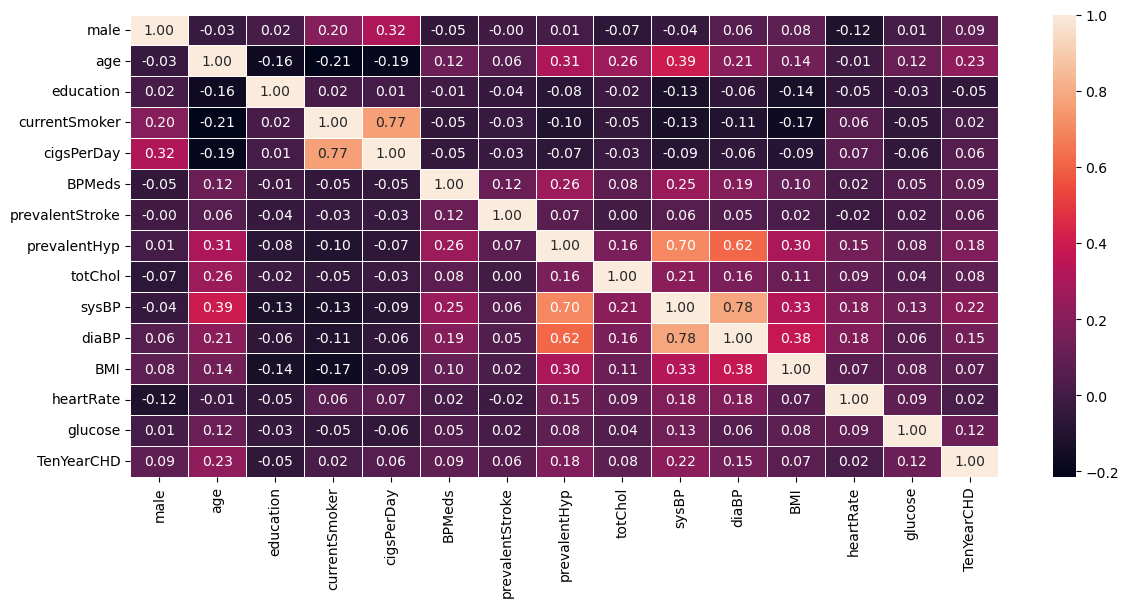

In [97]:
# خريطة حرارية باستخدام مصفوفة الارتباط الخاصة بـ 'x_d' (بعد معالجة القيم المفقودة)
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(x_d.corr(),annot=True,fmt='0.2f',linewidth=.5)

# Select feature

In [98]:
# اختيار الميزات
# يتم اختيار أعلى 70% من الميزات بناءً على درجاتها.
# حساب معاملات الارتباط بين كل ميزة والمتغير المستهدف
correlation_scores, _ = f_regression(x_d,y)
FeatureSelestion=SelectPercentile(score_func=f_regression , percentile=70)
x=FeatureSelestion.fit_transform(x_d,y)


In [99]:
# الحصول على أسماء أعمدة DataFrame 'x_d'
all_columns=x_d.columns
# إنشاء قائمة بأسماء الأعمدة المحددة بناءً على نتائج اختيار الميزة
selected_column_names=[all_columns[i] for i in range (len (all_columns)) if FeatureSelestion.get_support()[i]]
# تحويل أسماء الأعمدة المحددة إلى سلسلة مفصولة بفواصل
selected_column_names_as_text=','.join (selected_column_names)
# طباعة أسماء الأعمدة المحددة كنص
print(selected_column_names_as_text )



age,currentSmoker,BPMeds,prevalentHyp,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [100]:
# الميزات التي تم تحديدها بواسطة عملية اختيار الميزة.
# يتوافق كل عنصر مع ميزة في البيانات المدخلة، ويشير "صحيح" إلى أنه تم تحديد الميزة،
# بينما يشير "False" إلى عدم تحديد الميزة.
print(FeatureSelestion.get_support())

[False  True False  True False  True False  True False  True  True  True
  True  True  True]


In [101]:
# عدد الصفوف و الاعمده بعد اختيار الميزات
print(x.shape)

(4238, 10)


# Building Model

In [102]:

# ضبط عدد الطيات على 5
k=5
# إنشاء كائن KFold بعدد محدد من الأقسام
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# تحويل مصفوفة الميزات "x" والمتغير المستهدف "y" إلى كائنات DataFrame
x_df = pd.DataFrame(x) 
y_df = pd.DataFrame(y)
# تعيين أسماء أعمدة  للميزات
new_column_names = ['age','currentSmoker','BPMeds','prevalentHyp','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']
x_df.columns = new_column_names
new_column_names =['diabetes']
y_df.columns = new_column_names
# قوائم فارغة لتخزين مقاييس التقييم و مصفوفات الارتباك
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices=[]

In [103]:
x_df

,age,currentSmoker,BPMeds,prevalentHyp,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39.0,0.0,0.00000,0.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,46.0,0.0,0.00000,0.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,48.0,1.0,0.00000,0.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,61.0,1.0,0.00000,1.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,46.0,1.0,0.00000,0.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
4233,50.0,1.0,0.00000,1.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,51.0,1.0,0.00000,0.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,48.0,1.0,0.02963,0.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,44.0,1.0,0.00000,0.0,126.5,87.0,19.16,86.0,81.966753,0.0


In [104]:
# إنشاء نماذج متعددة للتعلم الآلي بتكوينات مختلفة.
# النموذج 1 هو  آلة المتجه الدعم (SVM) مع نواة خطية، وقيمة جاما التلقائية،
# تم تعيين معلمة التنظيم C على 1، وتم تحديد أوزان الفئة المخصصة لمعالجة عدم التوازن في البيانات.
model1 = svm.SVC(kernel='linear', gamma='auto', C=1, class_weight={0: 1, 1: 2})
# النموذج 2 هو مصنف Gaussian Naive Bayes
model2 = GaussianNB()
# لنموذج 3 هو  شجرة القرار بمعيار الإنتروبيا للحصول على المعلومات، بحد أقصى للعمق 4،
# وحالة عشوائية 42
model3 = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
# النموذج 4 هو  الانحدار اللوجستي، الذي يصمم العلاقة بين الميزات والهدف المستخدم
model4=LogisticRegression()


In [105]:
# قوائم نتائج فارغة لتخزين نتائج النماذج المختلفة
columns = ['SVM','GaussianNB','DecisionTreeClassifier','LogisticRegression', 'Backpropagation neural network ']
# قائمة لتخزين نتائج المقياس ( accuracy score)
result1=[]
# قائمة لتخزين نتائج المقياس ( recall score)
result2=[]
# قائمة لتخزين نتائج المقياس (f1 score)
result3=[]
# قائمة لتخزين نتائج المقياس (precision score)
result4=[]

In [106]:
# وظيفة لإجراء تقييم النموذج باستخدام التحقق المتقاطع
def cal(model,x,y):
    k=5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
   
   #تقسيم البيانات بإستخدام k-fold
    for train_index, test_index in kf.split(x):
        # يتم تقسيم البيانات إلى مجموعات تدريب واختبار لكل أضعاف التحقق من الصحة.
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # يتم تنفيذ تحجيم الميزات على مجموعات التدريب والاختبار باستخدام "StandardScaler".
        scaler = StandardScaler()
        X_train = scaler.fit_transform(x_train)
        X_test = scaler.transform(x_test)
       
       # تدريب النموذج علي بيانات التدريب 
        model.fit( X_train,y_train)
       # اختبار النموذج
        pred=model.predict( X_test)
        # حساب وتخزين مقاييس التقييم 
        accuracy_scores.append(accuracy_score(pred , y_test)) 
        recall_scores.append(recall_score(pred , y_test)) 
        f1_scores.append(f1_score(pred , y_test))
        precision_scores.append(precision_score(pred , y_test))
        # حساب وتخزين مصفوفة الارتباك
        cm=confusion_matrix(pred , y_test)
        confusion_matrices.append( cm)
    # حساب متوسط مقاييس التقييم عبر جميع الطيات
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)
    mean_f1 = sum(f1_scores) / len(f1_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    # حساب متوسط مصفوفات الارتباك عبر جميع الطيات
    con_matrix = sum(confusion_matrices)/5
    # خزين مقاييس التقييم المتوسطة في قوائم النتائج "result1" و"result2" و"result3" و"result4".    
    result1.append(mean_accuracy)
    result2.append(mean_recall)
    result3.append(mean_f1)
    result4.append(mean_precision)
    # تصور مصفوفة الارتباك المتوسطة باستخدام خريطة الحرارة
    sns.heatmap(   con_matrix , annot=True)
    # طباعة النموذج بالإضافة إلى مقاييس التقييم المتوسطة ومصفوفة الارتباك المتوسطة.
    print(model)
    print('accuracy is : ', mean_accuracy*100 ,'recall is :', mean_recall*100,'f1 is :', mean_f1*100,'precision is :', mean_precision*100)
    # إنشاء DataFrame لعرض مصفوفة الارتباك المتوسطة.
    cm_df = pd.DataFrame(con_matrix, index=['Actual N', 'Actual P'], columns=['Predicted N', 'Predicted P'])
    print(cm_df) 


SVC(C=1, class_weight={0: 1, 1: 2}, gamma='auto', kernel='linear')
accuracy is :  98.65496424673097 recall is : 93.03296703296704 f1 is : 66.40961497585816 precision is : 51.72105263157894
          Predicted N  Predicted P
Actual N        825.0         10.6
Actual P          0.8         11.2


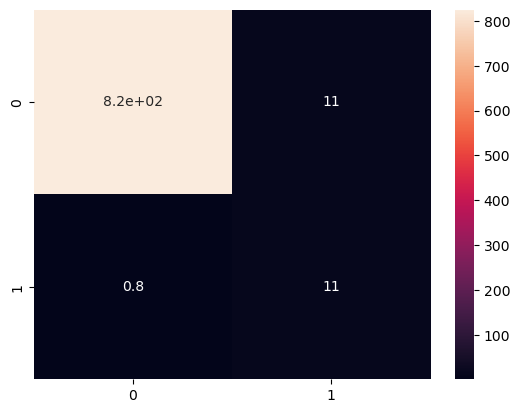

In [107]:
# استدعاء الداله باستخدام نموذج svm
cal(model1,x_df,y_df)

GaussianNB()
accuracy is :  96.42507685282128 recall is : 58.94157835811479 f1 is : 50.998047772548674 precision is : 57.34999999999999
          Predicted N  Predicted P
Actual N       1609.6         18.6
Actual P         42.0         25.0


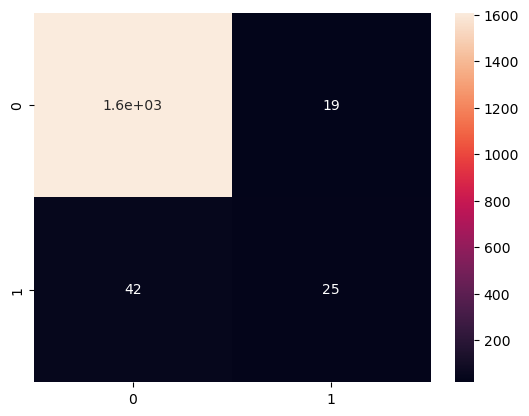

In [108]:
# استدعاء الداله باستخدام نموذج ساذج بايز
cal(model2,x_df,y_df)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
accuracy is :  97.09760865206836 recall is : 67.77165829934924 f1 is : 54.6360369628559 precision is : 54.65146198830409
          Predicted N  Predicted P
Actual N       2433.4         29.8
Actual P         44.0         35.6


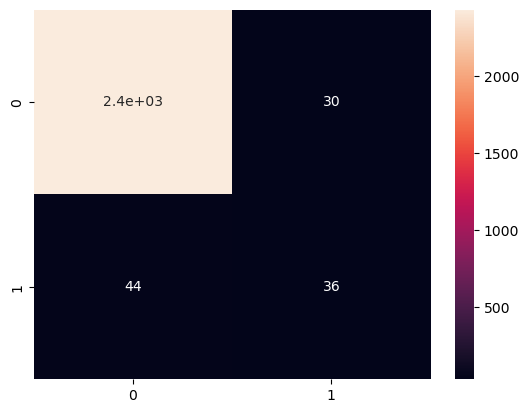

In [109]:
# استدعاء الداله باستخدام نموذج شجرة القرار
cal(model3,x_df,y_df)

LogisticRegression()
accuracy is :  97.47514117529127 recall is : 74.0869854827537 f1 is : 57.21393439008307 precision is : 53.518859649122795
          Predicted N  Predicted P
Actual N       3258.4         40.8
Actual P         44.8         46.4


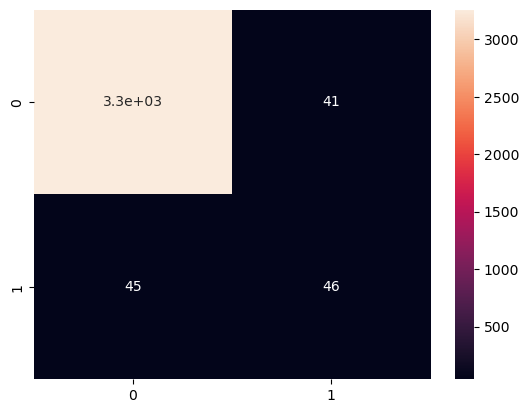

In [110]:
# استدعاء الداله باستخدام نموذج الانحدار اللوجيستي
cal(model4,x_df,y_df)

27/27 [==============================] - 0s 764us/step
accuracy is :  97.6733922167027 recall is : 73.8559520225666 f1 is : 56.86783629504624 precision is : 51.799298245614025
          Predicted N  Predicted P
Actual N       4083.4         53.0
Actual P         45.6         56.0


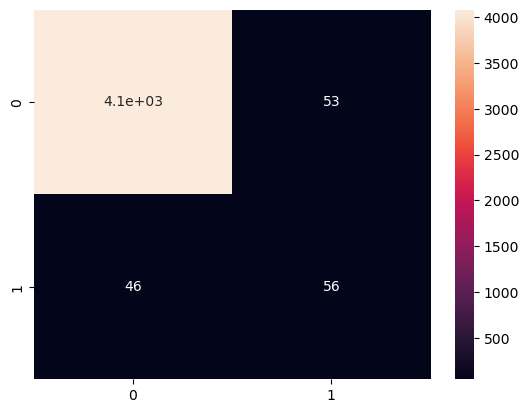

In [111]:
# يتكون هيكل النموذج من طبقة كثيفة مكونة من 8 وحدات ووظيفة التنشيط السيني كطبقة الإدخال،
# تليها طبقة كثيفة من وحدة واحدة ووظيفة التنشيط السيني كطبقة الإخراج
# تم تجميع النموذج باستخدام مُحسِّن "Adam" ودالة الخسارة "binary_crossentropy"

# تحديد بنية النموذج
model5 = keras.Sequential([
    keras.layers.Dense(8, activation='sigmoid', input_shape=(10,)),
    keras.layers.Dense(1, activation='sigmoid')
])
# تحديد دالة تجميع النموذج
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
for train_index, test_index in kf.split(x):
    x_train, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    # تنفيذ تحجيم الميزات في مجموعات التدريب والاختبار
    scaler = StandardScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)

    # تدريب النموذج على بيانات التدريب لعدد محدد من العصور
    model5.fit(X_train, y_train, epochs=100,batch_size=128, verbose=0)

    # عمل تنبؤات على بيانات الاختبار
    y_pred = (model5.predict(X_test) > 0.5).astype(int)
    
    accuracy_scores.append(accuracy_score(y_pred , y_test)) 
    recall_scores.append(recall_score(y_pred , y_test)) 
    f1_scores.append(f1_score(y_pred , y_test))
    precision_scores.append(precision_score(y_pred , y_test))
    confusion_matrices.append( confusion_matrix(y_pred , y_test))

mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
con_matrix = sum(confusion_matrices)/5
         
result1.append(mean_accuracy)
result2.append(mean_recall)
result3.append(mean_f1)
result4.append(mean_precision)

sns.heatmap(   con_matrix , annot=True)
#print(model5)
print(model5)
print('accuracy is : ', mean_accuracy*100 ,'recall is :', mean_recall*100,'f1 is :', mean_f1*100,'precision is :', mean_precision*100)

cm_df = pd.DataFrame(con_matrix, index=['Actual N', 'Actual P'], columns=['Predicted N', 'Predicted P'])
print(cm_df)
        

In [112]:
# طباعة قائمة النتائج لمقياس accuracy score
result1

[0.9865496424673097,
 0.9642507685282128,
 0.9709760865206836,
 0.9747514117529127,
 0.9767339221670269]

In [113]:
# طباعة قائمة النتائج لمقياس  recall score لكل النماذج
result2

[0.9303296703296704,
 0.5894157835811479,
 0.6777165829934925,
 0.740869854827537,
 0.738559520225666]

In [114]:
# طباعة قائمة النتائج لمقياس  f1 score لكل النماذج
result3

[0.6640961497585817,
 0.5099804777254867,
 0.5463603696285589,
 0.5721393439008307,
 0.5686783629504624]

In [115]:
# طباعة قائمة النتائج لمقياس precision لكل النماذج
result4

[0.5172105263157895,
 0.5734999999999999,
 0.546514619883041,
 0.535188596491228,
 0.5179929824561402]

In [116]:
# إنشاء DataFrame لتخزين النتائج النهائية
# سيحتوي DataFrame الناتج على مقاييس التقييم ("precision"، "recall"، "F1Score"، "accuracy") كأعمدة،
# مع القيم المقابلة من قوائم النتائج، وعمود "الخوارزمية" الذي يحتوي على أسماء الخوارزميات.
FinalResult= pd.DataFrame({'Algorithm':columns,'Accuracies':result1,'Recall':result2,'F1Score':result3,'Precision':result4})
FinalResult

,Algorithm,Accuracies,Recall,F1Score,Precision
0,SVM,0.986550,0.930330,0.664096,0.517211
1,GaussianNB,0.964251,0.589416,0.509980,0.573500
2,DecisionTreeClassifier,0.970976,0.677717,0.546360,0.546515
3,LogisticRegression,0.974751,0.740870,0.572139,0.535189
4,Backpropagation neural network,0.976734,0.738560,0.568678,0.517993


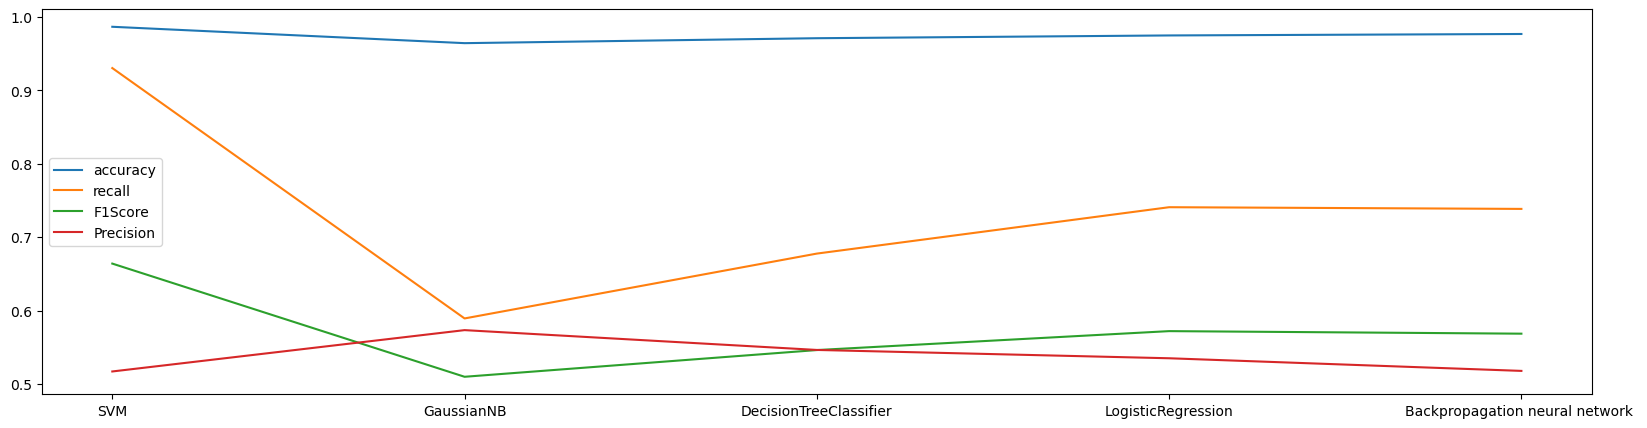

In [117]:
# إنشاء مخطط خطي لتصور مقاييس التقييم مقابل الخوارزميات.
# يتم إنشاء الشكل والمحاور باستخدام وظيفة "plt.subplots"، باستخدام المعلمةFigsize المحددة
# لضبط عرض وارتفاع الشكل
## يتم استخدام وظيفة "plt.plot" لرسم مقاييس التقييم مقابل الخوارزميات.
# تمثل كل قطعة مقياس تقييم مختلف، حيث يمثل المحور السيني عمود "الخوارزمية".
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result1,label='accuracy')
plt.plot(FinalResult.Algorithm,result2,label='recall')
plt.plot(FinalResult.Algorithm,result3,label='F1Score')
plt.plot(FinalResult.Algorithm,result4,label='Precision')
plt.legend()
plt.show()


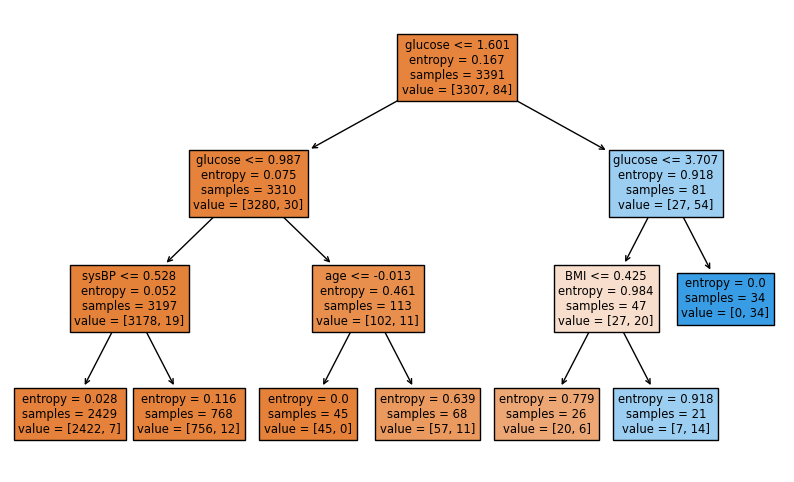

In [118]:
#نموذج شجرة القرار باستخدام وظيفة `plot_tree`
#تعيين أسماء أعمدة DataFrame `x_df` للمتغير `feature_name`.
# سيتم استخدامه لاحقًا لتسمية الميزات الموجودة في مخطط شجرة القرار.
feature_name = x_df.columns
feature_name = x_df.columns
#This line creates a new figure with a size of 10 inches in width and 6 inches in height using the `figure()` function from Matplotlib.
plt.figure(figsize=(10, 6))
# رسم شجرة القرار باستخدام وظيفة "plot_tree" من الوحدة النمطية "sklearn.tree". يمثل المتغير "model3" نموذج شجرة القرار المدربة. تقوم المعلمة `filled=True` بملء عقد الشجرة بالألوان بناءً على توزيع الفئة
# تقوم المعلمة `feature_names=feature_name` بتعيين أسماء الأعمدة من `feature_name` كتسميات للميزات في مخطط شجرة القرار.
plot_tree(model3, filled=True, feature_names=feature_name)
plt.show()

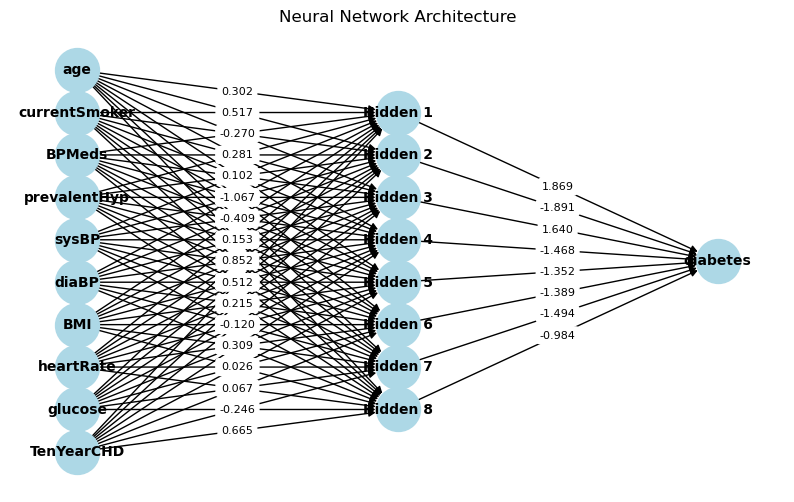

In [120]:
# رسم بنية الشبكه
plot_model(model5, to_file='model_architecture.png', show_shapes=True)# Create a directed graph     age,currentSmoker,BPMeds,prevalentHyp,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
G = nx.DiGraph()

# إضافة عقد طبقة الإدخال
input_layer = ['age', 'currentSmoker', 'BPMeds', 'prevalentHyp', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
G.add_nodes_from(input_layer, layer=0)

# اضافة عقد الطبقة المخفية
hidden_layer = ['Hidden 1', 'Hidden 2', 'Hidden 3', 'Hidden 4', 'Hidden 5', 'Hidden 6', 'Hidden 7', 'Hidden 8']
G.add_nodes_from(hidden_layer, layer=1)

# اضافة عق\ طبقة الاخراج
output_layer = ['diabetes']
G.add_nodes_from(output_layer, layer=2)

#  توصيل طبقة الإدخال بالطبقة المخفية بالأوزان
# يتم اخذ الاوزان من النموذج المدرب
input_hidden_weights = model5.layers[0].get_weights()[0]
for i, input_node in enumerate(input_layer):
    for j, hidden_node in enumerate(hidden_layer):
        weight = input_hidden_weights[i][j]
        G.add_edge(input_node, hidden_node, weight=weight)

# توصيل الطبقة المخفية بطبقة الإخراج بالأوزان بناء علي نمودج السبكه المدرب
hidden_output_weights = model5.layers[1].get_weights()[0]
for i, hidden_node in enumerate(hidden_layer):
    weight = hidden_output_weights[i][0]
    G.add_edge(hidden_node, 'diabetes', weight=weight)

# تعيين مواضع لتسميات العقد
pos = nx.multipartite_layout(G, subset_key='layer', align='vertical')

# رسم الشبكة العصبية
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')

# رسم الخطوط المتصله عبر الطبقات بالأوزان
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f"{v:.3f}" for k, v in edge_labels.items()}  # تنسيق الأوزان إلى ثلاث ارقام عشرية
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5, rotate=False)

plt.title('Neural Network Architecture')
plt.axis('off')
plt.show()

# Saving the trained model

In [121]:
# pickle is a Python module used for serializing and deserializing Python objects. It allows you to convert complex objects, such as lists, dictionaries, and custom classes, into a binary format that can be saved to a file or transmitted over a network. The pickled objects can later be reconstructed back into their original form using the unpickling process.
import pickle

In [122]:
# حفظ النماذج المدربة باستخدام Pickle
# تعيين أسماء الملفات لحفظ النماذج
filename1 = 'diabetes_model1.sav'
filename2= 'diabetes_model2.sav'
filename3= 'diabetes_model3.sav'
filename4 = 'diabetes_model4.sav'
filename5 = 'diabetes_model5.sav'
# استخدام Pickle لتفريغ النماذج المدربة في الملفات المعنية
pickle.dump(model1, open(filename1, 'wb'))
pickle.dump(model2, open(filename2, 'wb'))
pickle.dump(model3, open(filename3, 'wb'))
pickle.dump(model4, open(filename4, 'wb'))
pickle.dump(model5, open(filename5, 'wb'))